In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
pd.set_option('display.max_columns',100)

## Reading Dataset:

In [4]:
df=pd.read_csv(r'C:\Users\LENOVO\Desktop\SLR Final\SLR_DATASET\Ecommerce.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.shape

(500, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Finding Dtypes of the Features:

In [8]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
print('Cat_cols :',cat_cols)
print()
num_cols=list(df.select_dtypes(include=['float64','int64']).columns)
print('Num_cols :',num_cols)
print()

Cat_cols : ['Email', 'Address', 'Avatar']

Num_cols : ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']



In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
df.describe(include='object')

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,andrew06@peterson.com,"120 Micheal Fort Apt. 762\nEast Patrickbury, W...",Teal
freq,1,1,7


In [10]:
a=df.shape

In [11]:
for i in cat_cols:
    print('% of',i,'is',df[i].value_counts()[0]/a[0]*100)

% of Email is 0.2
% of Address is 0.2
% of Avatar is 1.4000000000000001


In [12]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

### there are no null values

In [13]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Check for Outliers:

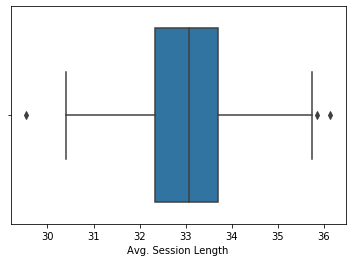

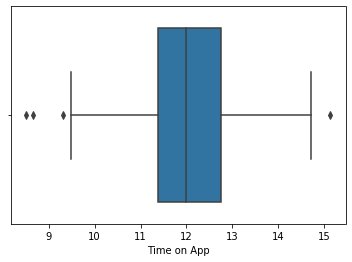

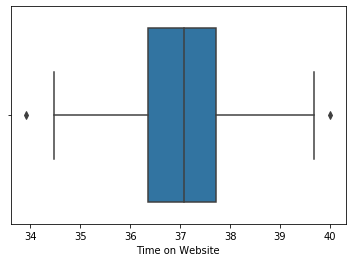

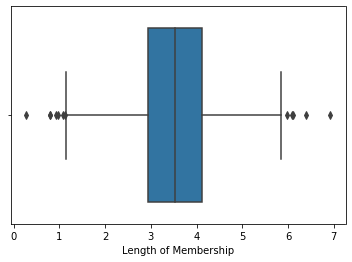

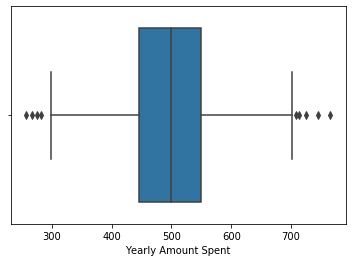

In [16]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

### there are some outliers in each category , no need to remove unless its a business call.

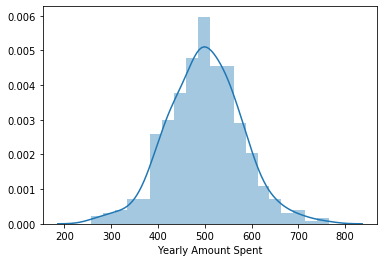

In [17]:
sns.distplot(df['Yearly Amount Spent'])

### yes it is normally distributed.

## Correlation Check:

In [18]:
a=df.corr()

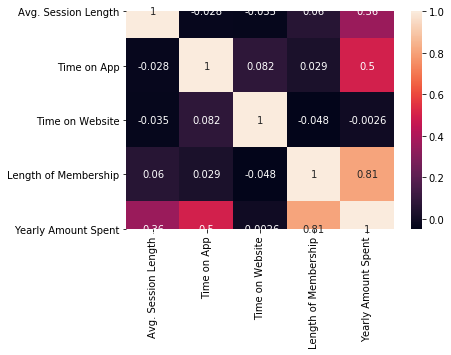

In [19]:
sns.heatmap(a,annot=True)

### high correlation is observed between length of membership and yearly amount spent
### good correlation is between time on app and yearly amount spent
### avg session length and yearly amount spent is also exhibiting good amount of positive correlation
### no correlation is between time on website and yearly amount spent


In [20]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [21]:
## email and address are of no importance in model creation so we drop them.

In [22]:
df1=df.copy()

In [24]:
df1.drop(['Email','Address'],axis=1,inplace=True)

In [25]:
df1.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [26]:
## name is the person is also of no-use in creation of models

In [27]:
df1.drop('Avatar',axis=1,inplace=True)

In [28]:
df1.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [29]:
df1.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [32]:
l=list(df1.columns)

In [33]:
type(l)

list

In [34]:
l

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

## Check for Distribution: 

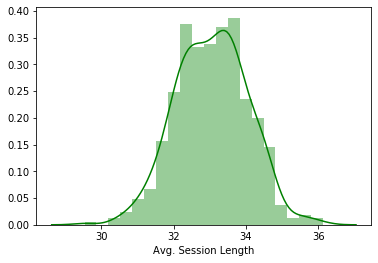

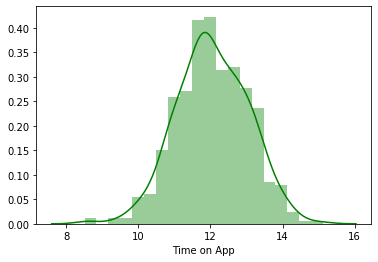

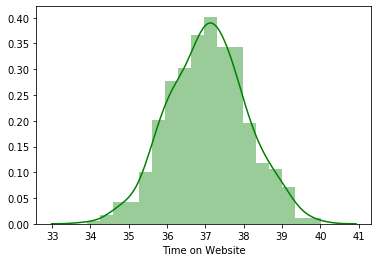

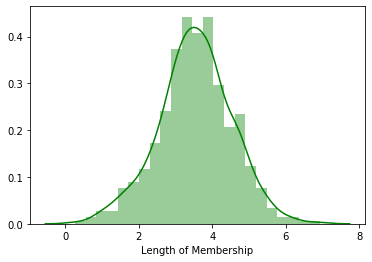

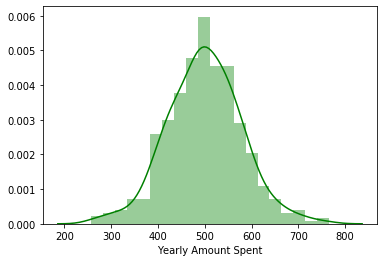

In [35]:
for i in l:
    sns.distplot(df1[i],color='green')
    plt.show()

### all the features are normally distributed no need of transformations

## Bivariate Analysis:

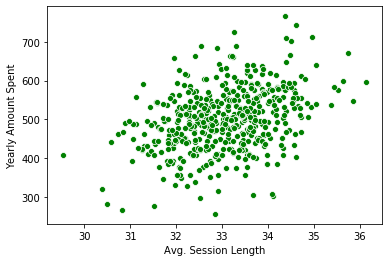

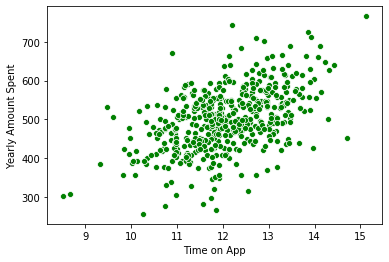

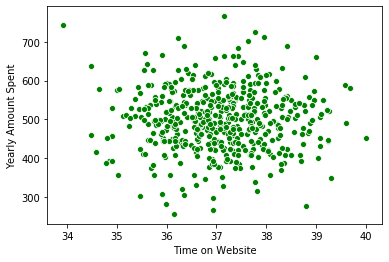

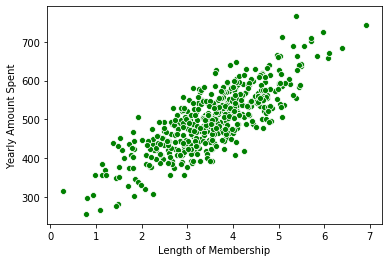

In [37]:
for i in l:
    if i!='Yearly Amount Spent':
        sns.scatterplot(df1[i],df1['Yearly Amount Spent'],color='green')
        plt.show()
        

### From the scatterplot u can find high correlation between length of membership and yearly amount spent and rest are randomly distributed.

## Train and Test Split:

In [47]:
y = df1['Yearly Amount Spent']
x = df1.drop('Yearly Amount Spent',axis =1)

In [57]:
xtrain, xtest , ytrain, ytest = train_test_split(x,y, test_size = 0.30, random_state = 100)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(350, 4)
(150, 4)
(350,)
(150,)


## Fitting a base model.


In [58]:
lin_reg = LinearRegression()
model = lin_reg.fit(xtrain,ytrain)

print(f'R^2 score for train: {lin_reg.score(xtrain, ytrain)}')
print(f'R^2 score for test: {lin_reg.score(xtest, ytest)}')

R^2 score for train: 0.9859706311414482
R^2 score for test: 0.9795595418573948


### In the base model the train and test scores appears to be nearly same So, the model is correctly fitted.

In [59]:
X_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                         11:51:58   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1051.5943     22.993    -45.736      0.000   -1096.769   -1006.419
Avg. Session Length     25.7343      0.451     57.057      0.000      24.848      26.620
Time on App             38.7092      0.451     85.828      0.000      37.823      39.595
Time on Website          0.4367      0.444      0.983      0.326      -0.436       1.309
Length of Membership    61.5773      0.448    137.346      0.000      60.696      62.458
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                     2.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The overall R^2 is approximately 98% 
### The base model itself is producing the greater accuracy and see whether it can be enchanced further.


In [60]:
import warnings 
warnings.filterwarnings('ignore')

In [66]:
lin_reg = LinearRegression()
model = lin_reg.fit(xtrain,ytrain)

print(f'R^2 score for train: {lin_reg.score(xtrain, ytrain)}')
print(f'R^2 score for test: {lin_reg.score(xtest, ytest)}')

R^2 score for train: 0.9859706311414482
R^2 score for test: 0.9795595418573948


In [67]:
ypred=lin_reg.predict(xtest)

In [68]:
ypred

array([445.03366357, 571.9842999 , 543.82099144, 435.28324271,
       516.75395208, 472.51154562, 397.63641528, 570.9601207 ,
       461.10489893, 542.65387284, 464.00119753, 443.17798179,
       452.17819678, 486.51810205, 643.35851533, 500.73640588,
       490.59849494, 467.63878633, 492.04256284, 336.36338594,
       427.11429355, 507.16406149, 623.52166028, 667.46165264,
       386.80146649, 559.15766875, 495.09792802, 434.93781501,
       511.35057192, 459.8539396 , 379.68766425, 462.5318818 ,
       479.87569095, 425.72310025, 570.58116279, 646.38784377,
       628.29780116, 523.48257891, 486.61912563, 516.76823106,
       554.29791565, 481.10714977, 505.54700661, 567.03564808,
       471.98034712, 590.86551033, 404.39735971, 490.54331824,
       531.58037663, 451.39798082, 563.48299185, 496.70197632,
       683.75010034, 531.24340022, 531.63337855, 491.70131354,
       313.25588549, 501.95501262, 421.54191377, 578.06129371,
       455.63250489, 523.34954714, 504.96975292, 511.95

In [69]:
print('R2 on the test: ',round((r2_score(ytest,ypred)*100),2))

R2 on the test:  97.96


### the prediction score is almost 98% and thus model is best fitted.

In [74]:
d=pd.DataFrame(ypred,ytest)

In [78]:
di={'Yearly Amount Spent':'ytest'}

In [85]:
d.rename(columns={0:'ypred'},inplace=True)

In [86]:
d.head()

,ypred
Yearly Amount Spent,
451.575685,445.033664
554.722084,571.984300
541.049831,543.820991
442.722892,435.283243
522.404141,516.753952


## c. Which variables are significant?


In [87]:
df1.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [91]:
print("the following are significant features:")
for i in l:
    if i!='Yearly Amount Spent':
        print(i)

the following are significant features:
Avg. Session Length
Time on App
Time on Website
Length of Membership


## Check for Multi-collinearity:

In [92]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T
# if no features are correlated then the vif value will be 1

,Avg. Session Length,Time on App,Time on Website,Length of Membership
vif,1.005422,1.008684,1.010275,1.006949


## there is no multicollinearity, since all vif values for the features are almost 1.

In [93]:
from sklearn import metrics

In [94]:
print('MAE:', metrics.mean_absolute_error(ytest,ypred))
print('MSE:', metrics.mean_squared_error(ytest,ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest,ypred)))

MAE: 8.51179029096586
MSE: 114.37618082343678
RMSE: 10.694680024359625


### Feature Selection

In [95]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(x)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                   7.175244e-180
Avg. Session Length     8.174101e-220
Time on App             2.217386e-299
Time on Website          3.258722e-01
Length of Membership     0.000000e+00
dtype: float64

In [96]:
cols = list(x.columns)
cols

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership']

In [97]:
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Avg. Session Length', 'Time on App', 'Length of Membership']


In [98]:
#modelling using the above variables
y = df1['Yearly Amount Spent']
x = df1[['Avg. Session Length', 'Time on App', 'Length of Membership']]
xtrain, xtest , ytrain, ytest = train_test_split(x,y, test_size = 0.30, random_state = 1)
lin_reg = LinearRegression()
model = lin_reg.fit(xtrain,ytrain)

print(f'R^2 score for train: {lin_reg.score(xtrain, ytrain)}')
print(f'R^2 score for test: {lin_reg.score(xtest, ytest)}')

R^2 score for train: 0.98212941001693
R^2 score for test: 0.9884050932707794


### we are getting same 98% accuracy even after feature selection using backward elimination technique.

## Recursive Feature Elimination

In [99]:
#no of features
nof_list=np.arange(1,18)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 3
Score with 3 features: 0.984935


In [ ]:
cols = list(x.columns)

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

In [101]:
# MODELLING THE DATA
y = df1['Yearly Amount Spent']
x = df1[['Avg. Session Length', 'Time on App', 'Length of Membership']]
xtrain, xtest , ytrain, ytest = train_test_split(x,y, test_size = 0.30, random_state = 1)
lin_reg = LinearRegression()
model = lin_reg.fit(xtrain,ytrain)

print(f'R^2 score for train: {lin_reg.score(xtrain, ytrain)}')
print(f'R^2 score for test: {lin_reg.score(xtest, ytest)}')

R^2 score for train: 0.98212941001693
R^2 score for test: 0.9884050932707794


### using RFE we are getting same 98% accuracy as base models but using 3 features, here base model uses 4 features.

## using lasso regression


In [102]:
lasso = Lasso()
lasso.fit(xtrain,ytrain)
train_score=lasso.score(xtrain,ytrain)
test_score=lasso.score(xtest,ytest)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.981600655363127
test score:  0.9877719965508772
number of features used:  3


In [103]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(xtrain,ytrain)
train_score001=lasso001.score(xtrain,ytrain)
test_score001=lasso001.score(xtest,ytest)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001)
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.982129357200043
test score for alpha =0.01:  0.9884043862323705
number of features used: for alpha =0.01: 3


In [104]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(xtrain,ytrain)
train_score00001=lasso00001.score(xtrain,ytrain)
test_score00001=lasso00001.score(xtest,ytest)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.9821294100121936
test score for alpha =0.0001:  0.9884050849935758
number of features used: for alpha =0.0001: 3


### using lasso we are able to improve accuracy upto some mimimal percentages.
### we are getting nearly close to 99% accuracy

## using Correlation


In [108]:
v1 = df1.corr()
print(v1['Yearly Amount Spent'].sort_values(ascending = False)[1:])

#Selecting highly correlated features with respect to the model
relevant_features = v1['Yearly Amount Spent'][v1['Yearly Amount Spent']>0.2]
relevant_features = relevant_features[1:]

relevant_features

Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.002641
Name: Yearly Amount Spent, dtype: float64


Time on App             0.499328
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

In [111]:
# checking for multi collinearity
x = df1[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df1['Yearly Amount Spent']
X_constant = sm.add_constant(x)
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns)

,vif
Avg. Session Length,1.005422
Time on App,1.008684
Time on Website,1.010275
Length of Membership,1.006949


In [112]:
## no multicollinearity

In [113]:
# MODELLING THE DATA
x = df1[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df1['Yearly Amount Spent']
xtrain, xtest , ytrain, ytest = train_test_split(x,y, test_size = 0.30, random_state = 1)
lin_reg = LinearRegression()
model = lin_reg.fit(xtrain,ytrain)

print(f'R^2 score for train: {lin_reg.score(xtrain, ytrain)}')
print(f'R^2 score for test: {lin_reg.score(xtest, ytest)}')


R^2 score for train: 0.9821435186471373
R^2 score for test: 0.9884637234896453


### using this correlation test we get same accuracy as lasso

## Summarization:

In [114]:
#OVERALL SUMMARY OF THE MODEL
x = df1[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df1['Yearly Amount Spent']
X_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                         13:05:21   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1051.5943     22.993    -45.736      0.000   -1096.769   -1006.419
Avg. Session Length     25.7343      0.451     57.057      0.000      24.848      26.620
Time on App             38.7092      0.451     85.828      0.000      37.823      39.595
Time on Website          0.4367      0.444      0.983      0.326      -0.436       1.309
Length of Membership    61.5773      0.448    137.346      0.000      60.696      62.458
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                     2.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### After trying out all the feature selection tests, the best model had an accuracy of 98.8% and it had used 3 features like Avg. Session Length,Time on App,Length of Membership.

### The best model was discovered using
### 1) Recursive feature elimination
### 2) Lasso regression
### and
### 3) backward elimination

### these three complimented each other by producing the same result and thus we can be confident that this is the best model that one can acheive using this dataset

## Business interpretation and Analysis of the model:

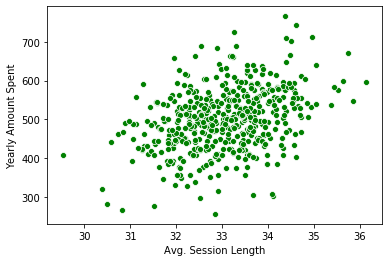

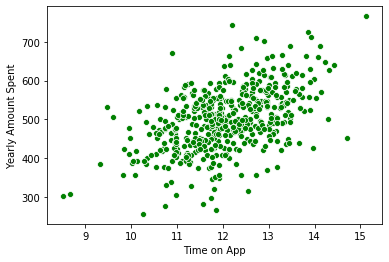

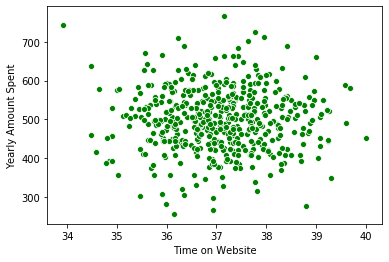

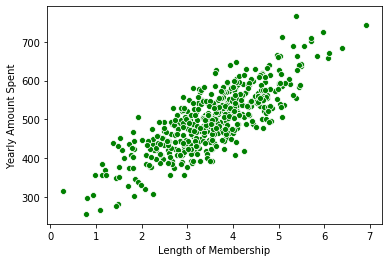

In [115]:
for i in l:
    if i!='Yearly Amount Spent':
        sns.scatterplot(df1[i],df1['Yearly Amount Spent'],color='green')
        plt.show()

### you can higher the length of membership the higher the spent money so give attractive coupons and discount to the customers, and ensure good service feel them satisfied with the results and make them subscribed to membership.

### give more discount to people who are using apps, because they are giving you better results than those are reaching through web, so make sure most of your customers are using apps.

## upon applying the lasso regression and other feature selection methods, we were able to increase the accuracy of the model by few percentage, and the model was fit perfectly rather than being overfit or underfit.